# European Social Survey

In [31]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [32]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [4]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***
#Include additional to params?

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

## Confusion Matrices

In [6]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'  #What's 'd'?
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


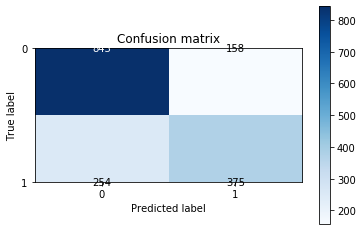

In [7]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

### Normalized Confusion Matrix

Normalized confusion matrix


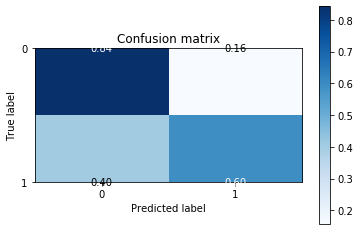

In [8]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

### Accuray Score

In [9]:
clf.score(X_test, y_test)

0.747239263803681

### Precision Score

In [10]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### Recall Score

In [11]:
recall_score(y_test,y_pred)

0.5961844197138315

#### Observation: Use 'feature_importance' to see how many times a certain feature was used in the newly configured decision trees. We will plot in horizontal histogram to guage, which will rank, the number of times a variable appeared. This can also be seen as level of importance. 

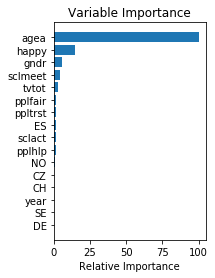

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Analysis:
It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner. The model is good. But let's see how we can lower the error rates in the test set (y_test).
Add Another Feature (no longer Binary, and cannot be a Classifier type of model).

Strategies we might use include:

~Creating new features
~Applying more overfitting-prevention strategies like subsampling
~More iterations
~Trying a different loss function
~Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications. Increased the depth of tree.

Sources: Gradient Boost ~  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
Confusion Matrix ~ https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html 

A few parameters to tune could be:

~learning_rate
~max_depth
~n_estimators
~loss
~subsample
~min_samples_split

## Second Model

In [13]:
# We'll make 750 iterations, use 4-deep trees, and set our loss function.
# Increase the n_estimators to 750 usually increases and better performance.
#Include additional to params?


params = {'n_estimators': 750,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [14]:
clf.score(X_test, y_test)

0.7386503067484662

In [15]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.6911487758945386

In [16]:
recall_score(y_test,y_pred)

0.5834658187599364

### Analysis: Each of our scores (accuracy, precision, and recall scores decreased. We didn't improve the performance even though increasing the 'n_estimators' usually results in better performance.

## Third Model

In [17]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [18]:
clf.score(X_test, y_test)

0.7533742331288343

### Analysis: This third model improved the second model, but not upon the first model.

## Fourth Model
We will increase 'n_estimators' to 750 and 'max_depth' to 4. We'll also increase the minimum numbers of samples required before splitting.

In [19]:
#Adjustments below
params = {'n_estimators': 750,
          'max_depth': 4,'min_samples_split': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params) # ** is an exponent
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [20]:
clf.score(X_test, y_test)

0.7374233128834355

## Challenge in Model Selection 

1)  To predict running times, we will use an OLS Regression Model assuming normal distribution.
2) To deal with more features than rows, we will use K Nearest Neighbors model because there's not enough records. 
3) We will predict the likelihood of being jailed after identifying most important characteristics using a Logistic Regression Model (also known as Linear Probit Model) because the coefficients share the likelihood of parameters' (characteristics) effect on going to jail. But better to use Decision Tree Regression Model.
4) Filter to "highlight" emails by using the Random Forest Model. Actually may use any type of classification model, including Naive Bayes. 
5) We can address the 1,000 Features problem by using Feature Importance tool in SKLEARN -- assuming that there' 1,000 rows that are not multiples of each other.
6) Predict when someone adds items on website if they will purchase, is a binary response for target. This can be classified as categorical or numerical if time is over discrete period of time. We can use Decision Tree classified based on consumer's behavior. We could use Decision Tree Regression Model if we are trying to pinpoint the time it takes to purchase.
7) Great data set issue: we have over 900,000 records/rows with 500 distinct columns for reviewing features. Depending on the whether we are identifying our target variable as 'categorical' or 'numerical' continuous, we may use any model.  More information on the specific research question will inform the best selection for one of these models.
8) Identifying faces could reduce images into thousands of pixels, and thereby be filtered into a Decision Tree Model to produce the selection of which nodes built the image. We can use Neural networks too.
9) Predicting 3 flavors of ice cream between both boys and girls is a classic marketing question that can be identified in focus groups. However, during pandemics, social distancing requires using data to inform decisions. We could use K Nearest Neighbor regardless of smaller sample size. 

# Advanced Experimentation

## Questions
*1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
~2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.
*3) Who reported watching more TV in 2012, men or women?
~4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
~5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
~6)Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

https://docs.scipy.org/doc/scipy/reference/stats.html


Q 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

In [21]:
df["cntry"].unique()
# We need to select each country. 

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [70]:
df["cntry"].value_counts

<bound method IndexOpsMixin.value_counts of 0       CH
1       CH
2       CH
3       CH
4       CH
        ..
8589    SE
8590    SE
8591    SE
8592    SE
8593    SE
Name: cntry, Length: 8147, dtype: object>

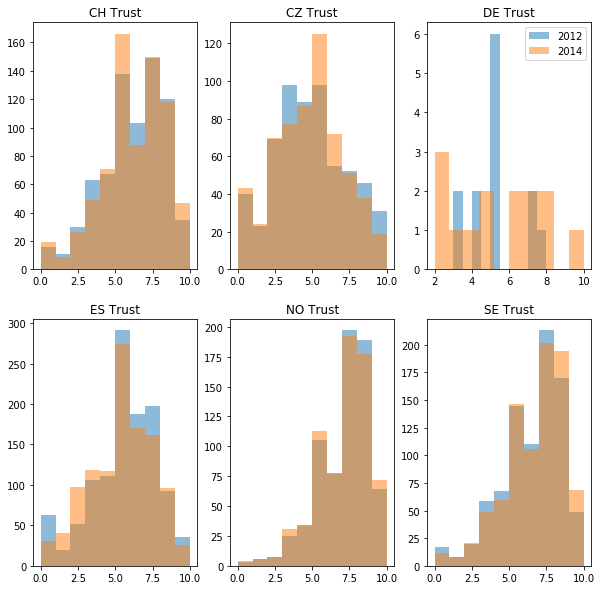

In [22]:
plt.subplots(2, 3, figsize=(10,10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

figs = [ax1, ax2, ax3, ax4, ax5, ax6]

cntry = df["cntry"].unique()

for f, c in zip(figs, cntry):
    f.hist(df[(df["cntry"] == c) & (df["year"] == 6)]["ppltrst"].dropna(), alpha=.5, label="2012")
    f.hist(df[(df["cntry"] == c) & (df["year"] == 7)]["ppltrst"].dropna(), alpha=.5, label="2014")
    f.set_title(c + " Trust")

ax3.legend()

In [33]:
from scipy import stats

### because all the variables seem normally distributed, I will use the t-test for paired samples
print("Comparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[0])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[0]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[1])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[1]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[2])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[2]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[3])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[3]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[4])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[4]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

print("\nComparing 2012/2014 Levels of Trust in ", df["cntry"].unique()[5])
print(stats.ttest_rel(df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 6)]["ppltrst"], 
               df[(df["cntry"] == df["cntry"].unique()[5]) & (df["year"] == 7)]["ppltrst"], nan_policy="omit"))

Comparing 2012/2014 Levels of Trust in  CH


ValueError: unequal length arrays

In [28]:
import statistics as stats
print("Sweden's average trust in 2012:", statistics.mean(df[(df["cntry"] == "SE") & (df["year"] == 6)]["ppltrst"].dropna()))
print("Sweden's average trust in 2014:", statistics.mean(df[(df["cntry"] == "SE") & (df["year"] == 7)]["ppltrst"].dropna()))
print("\nSpain's average trust in 2012:", statistics.mean(df[(df["cntry"] == "ES") & (df["year"] == 6)]["ppltrst"].dropna()))
print("Spain's average trust in 2014:", statistics.mean(df[(df["cntry"] == "ES") & (df["year"] == 7)]["ppltrst"].dropna()))

Sweden's average trust in 2012: 6.043073341094296
Sweden's average trust in 2014: 6.239907727797001

Spain's average trust in 2012: 5.127806563039724
Spain's average trust in 2014: 4.940035273368607


Q2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.


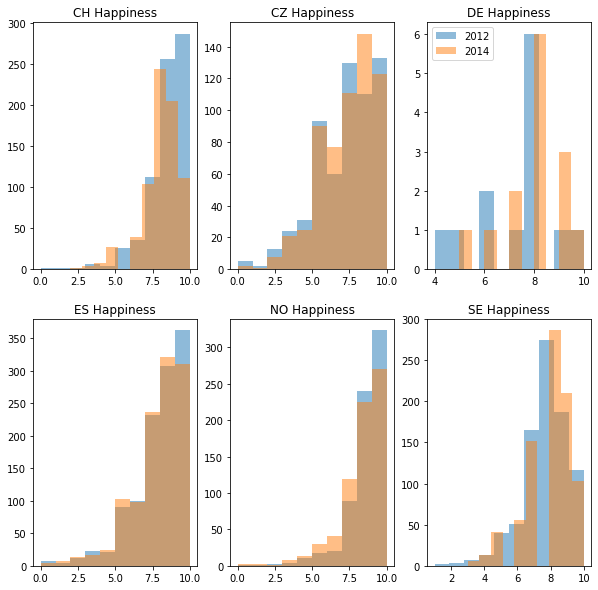

In [24]:
plt.subplots(2, 3, figsize=(10,10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

figs = [ax1, ax2, ax3, ax4, ax5, ax6]

cntry = df["cntry"].unique()

for f, c in zip(figs, cntry):
    f.hist(df[(df["cntry"] == c) & (df["year"] == 6)]["happy"].dropna(), alpha=.5, label="2012")
    f.hist(df[(df["cntry"] == c) & (df["year"] == 7)]["happy"].dropna(), alpha=.5, label="2014")
    f.set_title(c + " Happiness")

ax3.legend()

## Q3: Who reported watching more TV in 2012, men or women?
### Observation: Women reported watching more TV a bit more than men about half of the time. 

Text(0.5, 1.0, 'TV Watching in 2012')

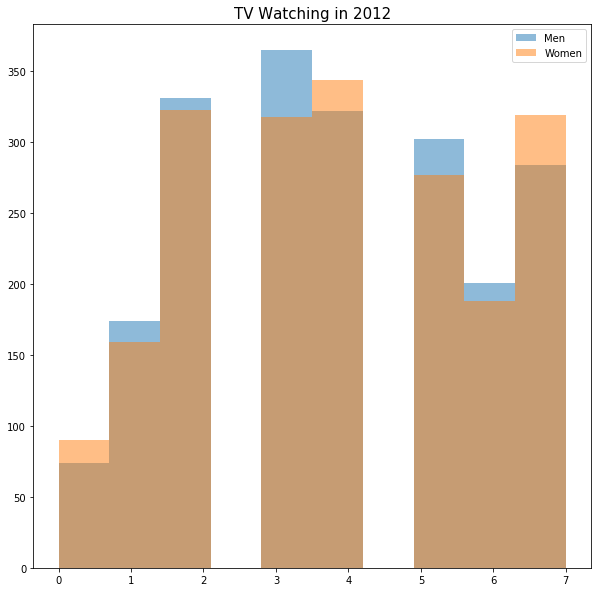

In [25]:
plt.figure(figsize=(10,10))
plt.hist(df[(df["gndr"] == 1.0) & (df["year"] == 6)]["tvtot"].dropna(), label="Men", alpha=.5)
plt.hist(df[(df["gndr"] == 2.0) & (df["year"] == 6)]["tvtot"].dropna(), label="Women", alpha=.5)
plt.legend()
plt.title("TV Watching in 2012", size=15)

In [34]:
#the variable seems non-normally distributed, we will use the Mann-Whitney rank test.
print("Comparing 2012 TV totals between men and women.")
print(stats.mannwhitneyu(df[(df["gndr"] == 1.0) & (df["year"] == 6)]["tvtot"], 
               df[(df["gndr"] == 2.0) & (df["year"] == 6)]["tvtot"]))

Comparing 2012 TV totals between men and women.
MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


### Observation: According to the Mann-Whiteney rank test, the difference was not statistically significant.

## Q4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Text(0.5, 1.0, 'The Number of People Who Believe That Others Are Fair in 2012')

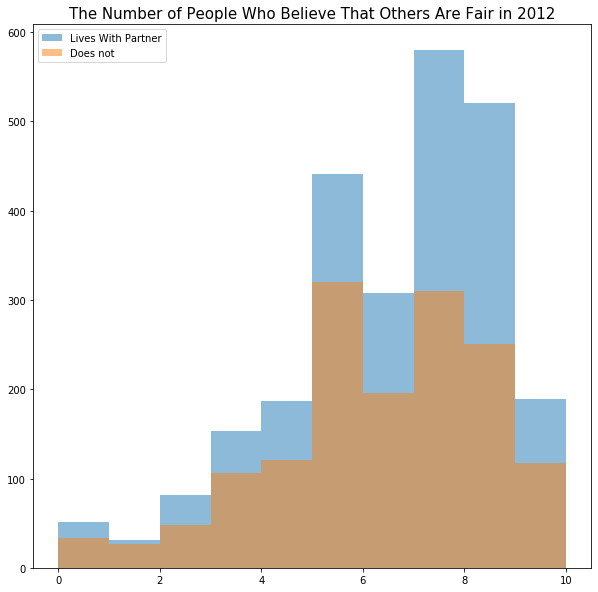

In [35]:
#Select those with a partner in 2012 versus those living along. 
plt.figure(figsize=(10,10))
plt.hist(df[(df["partner"] == 1.0) & (df["year"] == 6)]["pplfair"].dropna(), label="Lives With Partner", alpha=.5)
plt.hist(df[(df["partner"] == 2.0) & (df["year"] == 6)]["pplfair"].dropna(), label="Does not", alpha=.5)
plt.legend()
plt.title("The Number of People Who Believe That Others Are Fair in 2012", size=15)

### Observation: People living with a partner were more likely to believe that people were fair in 2012. According to the t-test for independent samples, the difference was statistically significant.

## Q5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

https://github.com/jtillis0317/Drills-and-Projects/blob/master/Challenge%20-%20What%20Test%20to%20Use%20(European%20Social%20Survey).ipynb

In [54]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Text(0.5, 1.0, 'How Frequently People Meet Socially in 2014')

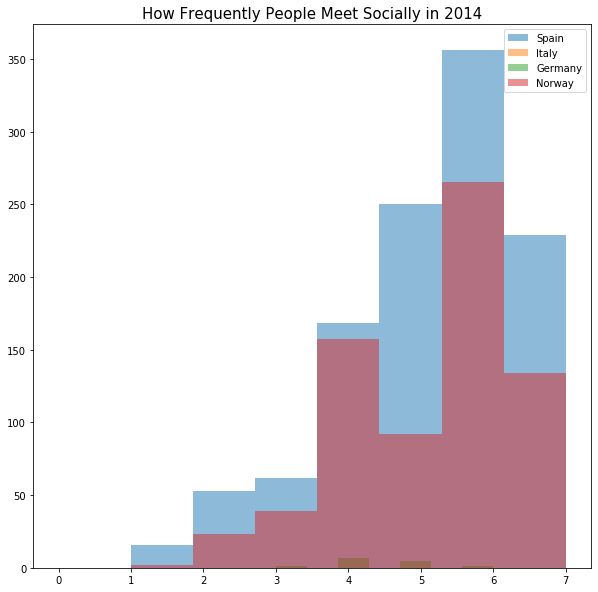

In [71]:
#Select Turkey, Italy, Germany, and Norway. Use 'sclmeet' of df to represent []"How often people met socially" &  pick 'year' 
# as value == '7'] to represent the year 2014. We need to drop columns with Null values.
plt.figure(figsize=(10,10))

plt.hist(df[(df["cntry"] == "ES") & (df["year"] == 7)]["sclmeet"].dropna(), label="Spain", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "IT") & df["year"] == 7]["sclmeet"].dropna(), label = "Italy", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclmeet"].dropna(), label="Germany", alpha=.5, bins=7)
plt.hist(df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclmeet"].dropna(), label="Norway", alpha=.5, bins=7)
plt.legend()
plt.title("How Frequently People Meet Socially in 2014", size=15)

## Mood's Median Test

In [82]:
ES_df = pd.DataFrame(df[df["cntry"] == "ES"]["sclmeet"])
IT_df = pd.DataFrame(df[df["cntry"] == "IT"]["sclmeet"])
DE_df = pd.DataFrame(df[df["cntry"] == "DE"]["sclmeet"])
NO_df = pd.DataFrame(df[df["cntry"] == "NO"]["sclmeet"])
CH_df = pd.DataFrame(df[df['cntry'] == 'CH']['sclmeet'])

In [73]:
ES_df.head()

,sclmeet
2890,7.0
2891,5.0
2892,6.0
2893,4.0
2894,7.0


In [74]:
statistics.mean(ES_df.iloc[:, 0].dropna())

5.2425828970331585

In [77]:
## because all the variables seem non-normally distributed (although it's a close call), I will use 
#Mood's median test based on mutliple samples for this experiment and select: Spain, Sweden, .

print("Comparing 2014 Frequency of Social Meetings Between Countries")
stats.median_test(df[(df["cntry"] == "ES") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "SE") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclmeet"].dropna(), df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclmeet"].dropna())

#The p-value shows that at least one group differs to a statistically significant degree.

Comparing 2014 Frequency of Social Meetings Between Countries


(15.763795063144473, 0.0012676929671514281, 6.0, array([[229, 220,   0, 134],
        [905, 647,  14, 578]]))

### Analysis: 
Norway's data stands out in red among the four countries we chose (which also included Turkey, Italy, and Germany). Through Mood's median test, it was clear that at least one of the groups had a different median. When I plotted boxplots, Norway's median was 6, while the median of the other countries was 5.

## Q6: Pick three of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Use an ANOVA test because we are looking at more than 2 samples (countries) for those who 'take part in social activities compared to others of same age', labeled as 'sclact'. Based on Figure 6: Looks like each sample is normally distributed for ANOVA test.

Text(0.5, 1.0, 'Figure 6: Social Activities Relative to Others Their Age in 2014')

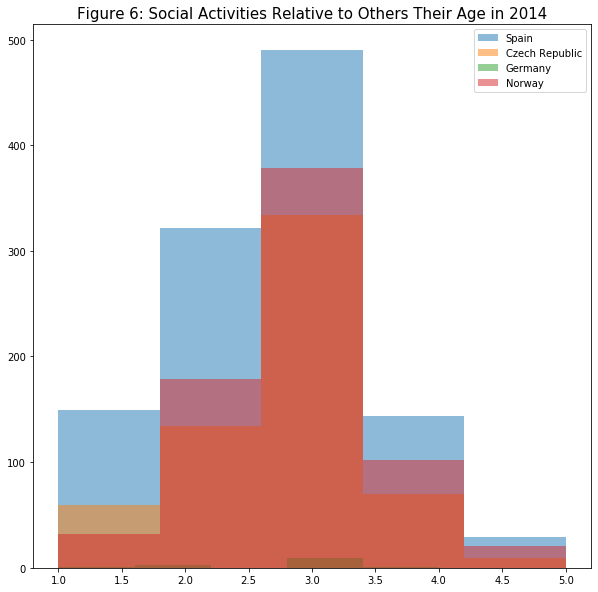

In [78]:

plt.figure(figsize=(10,10))
plt.hist(df[(df["cntry"] == "ES") & (df["year"] == 7)]["sclact"].dropna(), label="Spain", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclact"].dropna(), label="Czech Republic", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclact"].dropna(), label="Germany", alpha=.5, bins=5)
plt.hist(df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclact"].dropna(), label="Norway", alpha=.5, bins=5)
plt.legend()
plt.title("Figure 6: Social Activities Relative to Others Their Age in 2014", size=15)

We see highest curve for Spain, which stands out for 'take part in social activities compared to others of same age'. 

In [64]:
print("Comparing 2014 Social Activities Relative to Age Group Between Countries")
stats.f_oneway(df[(df["cntry"] == "IS") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "CZ") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "DE") & (df["year"] == 7)]["sclact"].dropna(), df[(df["cntry"] == "NO") & (df["year"] == 7)]["sclact"].dropna())

#The p-value shows that at least one group differs to a statistically significant degree.

Comparing 2014 Social Activities Relative to Age Group Between Countries


F_onewayResult(statistic=nan, pvalue=nan)

In [79]:
ES_df = pd.DataFrame(df[df["cntry"] == "IS"]["sclact"])
CZ_df = pd.DataFrame(df[df["cntry"] == "CZ"]["sclact"])
DE_df = pd.DataFrame(df[df["cntry"] == "DE"]["sclact"])
NO_df = pd.DataFrame(df[df["cntry"] == "NO"]["sclact"])

In [67]:
#Looking at Czech Republic
CZ_df.head()

,sclact
1546,3.0
1547,3.0
1548,5.0
1549,3.0
1550,3.0


In [68]:
statistics.mean(CZ_df.iloc[:, 0].dropna())

2.6735708367854185

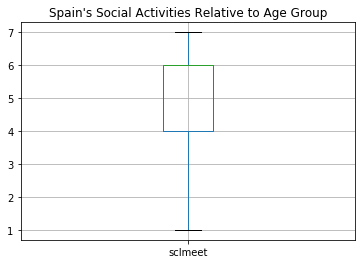

Median:  6.0
Average:  5.2425828970331585


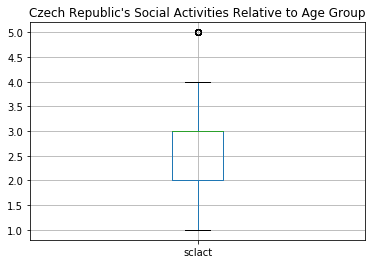

Median:  3.0
Average:  2.6735708367854185


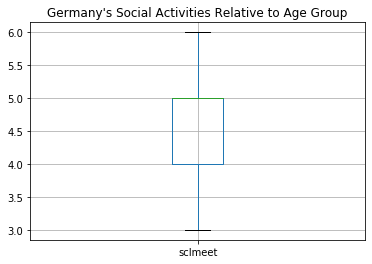

Median:  5.0
Average:  4.666666666666667


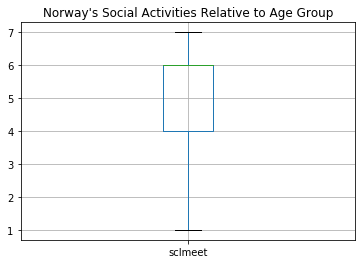

Median:  6.0
Average:  5.436619718309859


In [85]:
ES_df.dropna().boxplot()
plt.title("Spain's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(ES_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(ES_df.iloc[:, 0].dropna()))

CZ_df.dropna().boxplot()
plt.title("Czech Republic's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(CZ_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(CZ_df.iloc[:, 0].dropna()))

DE_df.dropna().boxplot()
plt.title("Germany's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(DE_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(DE_df.iloc[:, 0].dropna()))

NO_df.dropna().boxplot()
plt.title("Norway's Social Activities Relative to Age Group")
plt.show()
print("Median: ", statistics.median(NO_df.iloc[:, 0].dropna()))
print("Average: ", statistics.mean(NO_df.iloc[:, 0].dropna()))

In [84]:
#Run t-test for Spain, Czech Republic, Germany, and Norway.
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), CZ_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), DE_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CH_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CZ_df.iloc[:, 0].dropna(), DE_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(CZ_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))
print(stats.ttest_ind(DE_df.iloc[:, 0].dropna(), NO_df.iloc[:, 0].dropna()))

Ttest_indResult(statistic=55.83349864456405, pvalue=0.0)
Ttest_indResult(statistic=1.9044630238386817, pvalue=0.05704104639107802)
Ttest_indResult(statistic=-5.877592792471081, pvalue=4.638353223973658e-09)
Ttest_indResult(statistic=-11.464345350612309, pvalue=5.538600784239318e-29)
Ttest_indResult(statistic=-61.9519743298596, pvalue=0.0)
Ttest_indResult(statistic=-3.033048460977441, pvalue=0.002464111115169418)


### Analysis:
There are differences in this variable "sclact". Spain and Norway present the highest median with a value of "6" and the highest means regarding social activities within their age group: "Take part in social activities compared to others of same age". 